Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6548 - accuracy: 0.6016 - val_loss: 0.5771 - val_accuracy: 0.6944
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6261 - accuracy: 0.6156 - val_loss: 0.5463 - val_accuracy: 0.6944
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6359 - val_loss: 0.5233 - val_accuracy: 0.7361
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.6797 - val_loss: 0.4988 - val_accuracy: 0.7917
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7359 - val_loss: 0.4536 - val_accuracy: 0.7639
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7422 - val_loss: 0.4229 - val_accuracy: 0.9028
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5231 - accuracy: 0.7672 - val_loss: 0.3992 - val_accuracy: 0.8889
Epoch 8/100


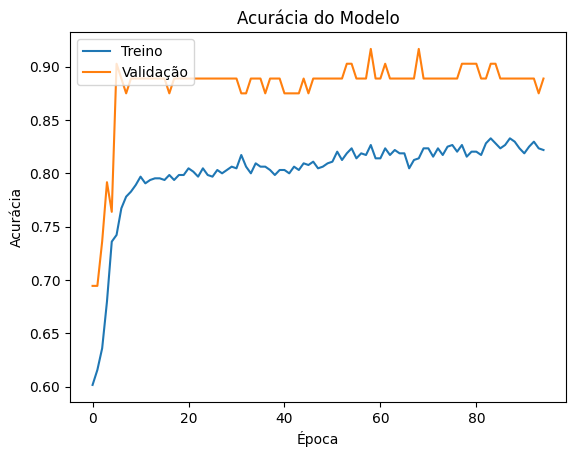

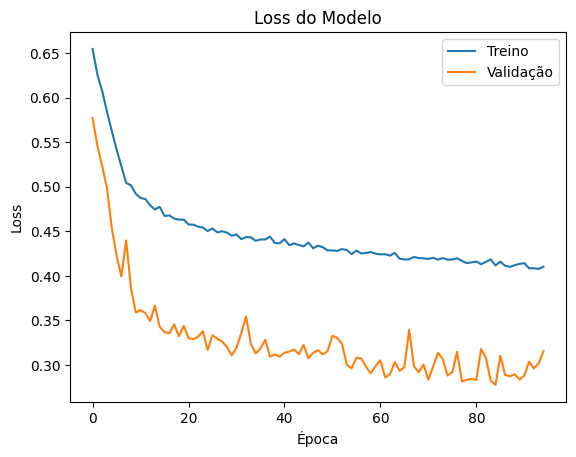

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Carregando o conjunto de dados
df = pd.read_csv('train.csv')

# Removendo colunas irrelevantes ou com muitos valores faltantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Preenchendo valores faltantes na coluna 'Age' com a média
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Preenchendo valor faltante na coluna 'Embarked' com o valor mais comum
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificação de variáveis categóricas
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Normalização dos dados numéricos
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Dividindo o conjunto de dados em treinamento e teste
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função de ativação para as camadas ocultas: ReLU
# Função de ativação para a camada de saída: Softmax
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Parada antecipada
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=32, callbacks=[early_stop])

# Avaliação do modelo com os dados de teste
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Plotar gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

# Plotar gráfico de loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do Modelo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.show()
